## **Analisis Prediktif : Prediksi Data Biaya Asuransi Kesehatan yang Dikeluarkan Pasien**

**Oleh** : Alifia Feiling A.S

*Proyek Submission 1 - Machine Learning Terapan Dicoding*

#Pendahuluan

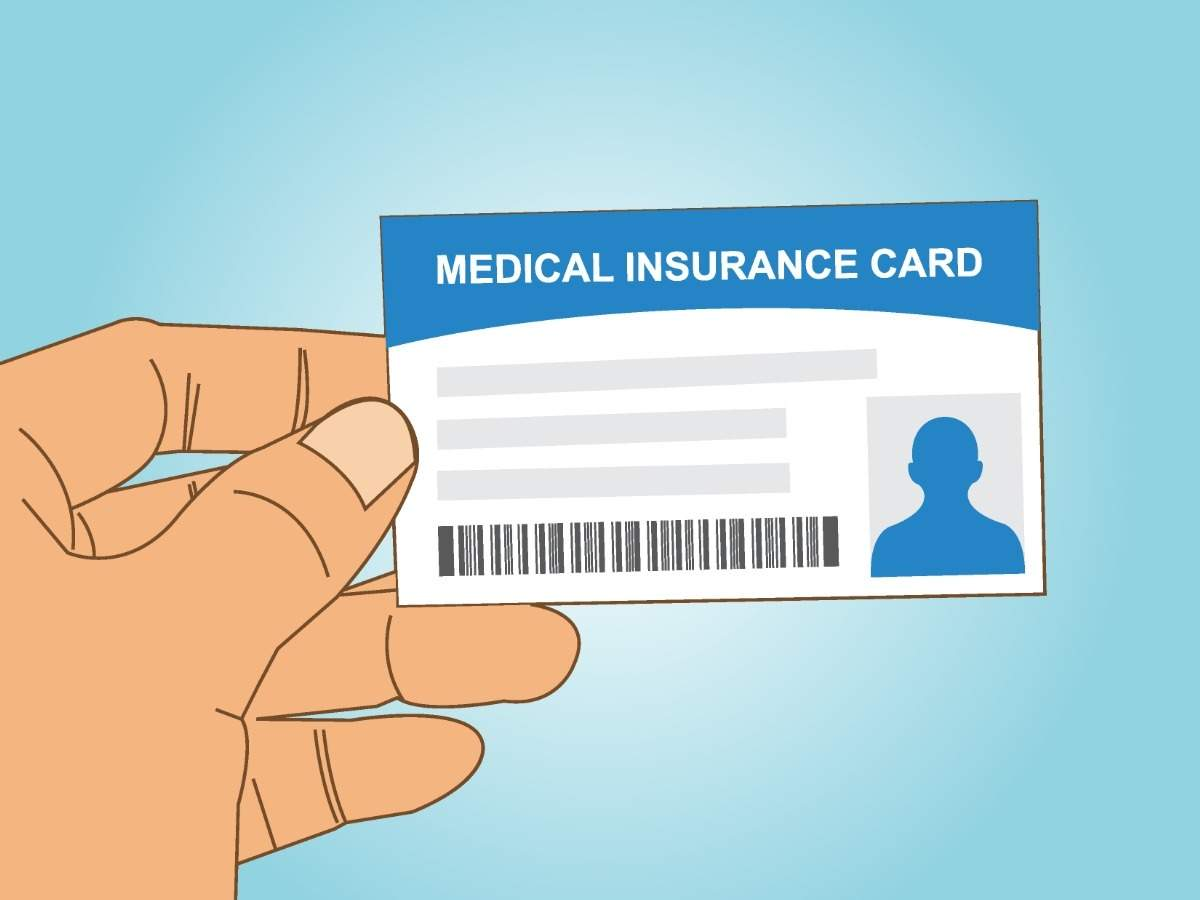

Pada proyek ini, topik yang dibahas adalah mengenai keuangan yang dibuat untuk memprediksi data biaya asuransi kesehatan yang dikeluarkan pasien. Proyek ini dibuat untuk proyek Submission 1 - Machine Learning Terapan Dicoding. 

#**1. Mempersiapkan Dataset**

**1.1. Kredensial akun kaggle**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!ls ~/.kaggle

kaggle.json


**1.2. Mengunduh dan Mempersiapkan Dataset**

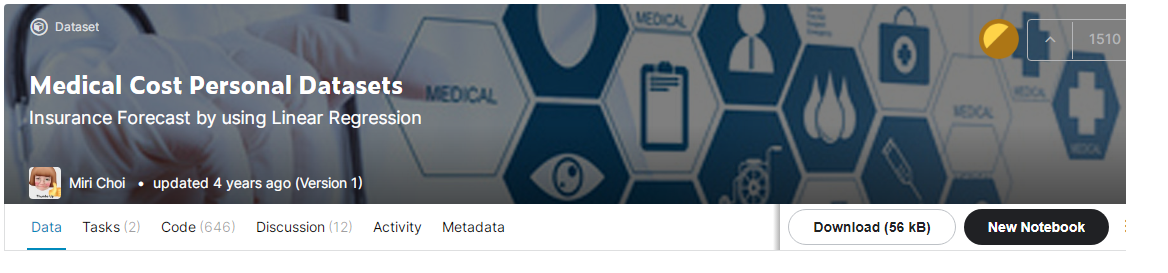

In [7]:
# Mengunduh dataset menggunakan Kaggle CLI
!kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 30.4MB/s]


In [8]:
# Mengekstrak berkas zip ke direktori aktif saat ini
!mkdir sehat
!unzip -qq /content/insurance.zip -d sehat
!ls sehat

insurance.csv


#**2. Mengimpor pustaka/modul Python**

In [9]:
#untuk pengolahan data
import missingno as msno
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#untuk pembuatan model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#untuk mengevaluasi model
from sklearn import metrics



#**3. Pemahaman Data *(Data Understanding)***

## **3.1 Memuat data pada sebuah dataframe menggunakan pandas**

In [10]:
sehat = pd.read_csv("/content/sehat/insurance.csv")

## **3.2 Keterangan kolom pada dataset**

In [11]:
# Memuat informasi dataframe
sehat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
#menghitung jumlah data kosong pada setiap kolom
sehat.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
#memuat deskripsi setiap kolom dataframe
sehat.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **3.3 Visualisasi Data**

### **3.3.1 Korelasi Data Antar Fitur**

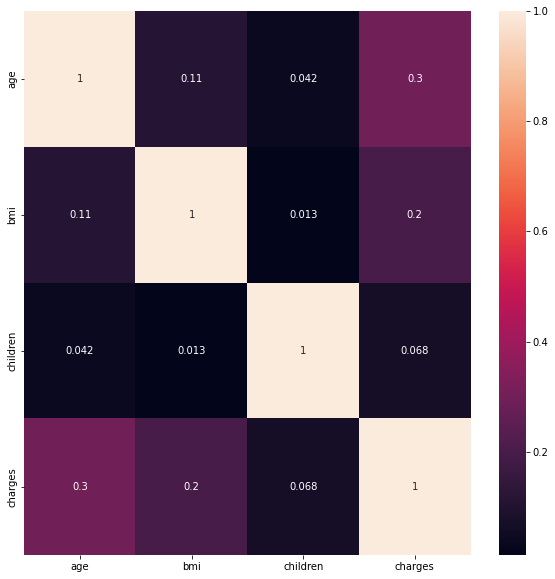

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(sehat.corr(), annot=True)
plt.show()

## **3.3.2 Visualisasi Data yang Kosong**

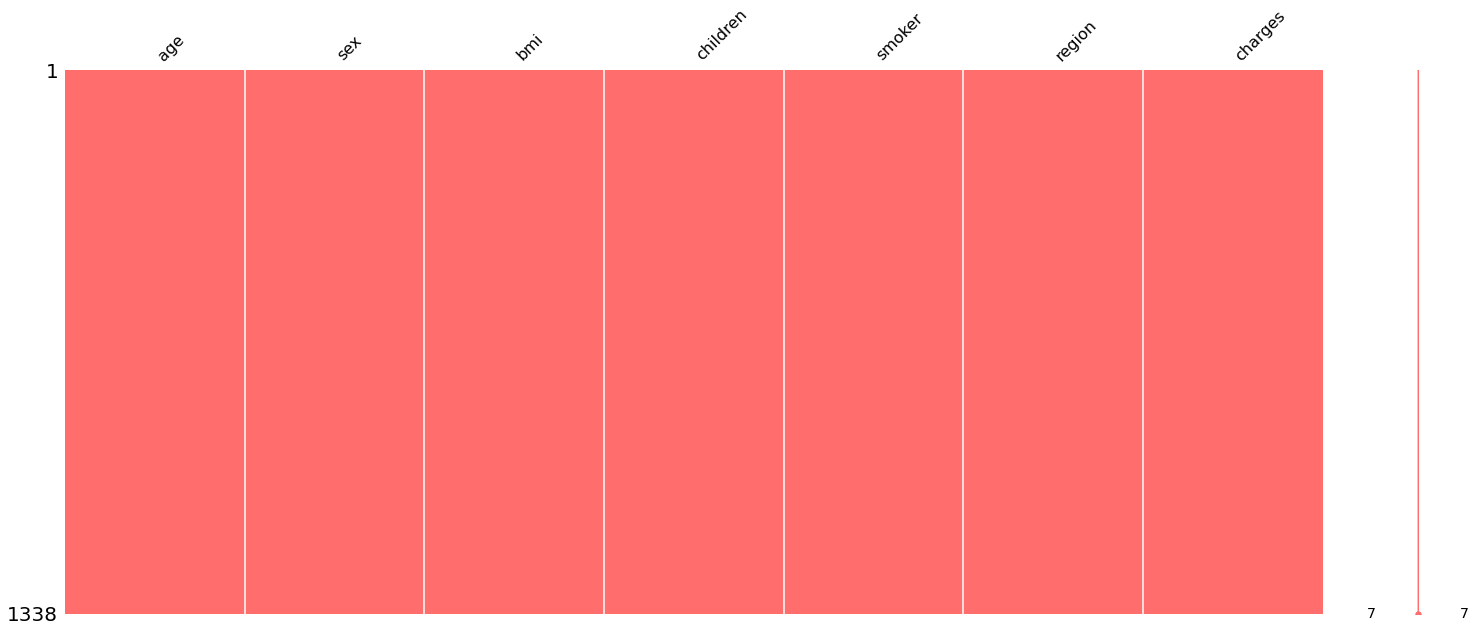

In [15]:
# Melakukan visualisasi data yang kosong
sorted_null = msno.nullity_sort(sehat, sort='descending') 
figures = msno.matrix(sorted_null, color=(1, 0.43, 0.43))

## **3.3.3 Visualisasi Data untuk kolom Charges berelasi dengan kolom 'bmi' dan 'age'**

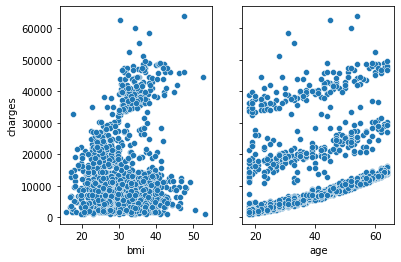

In [16]:
fig, axes = plt.subplots(1, 2, sharey=True)

plot_bmi = sns.scatterplot(y = 'charges', x = 'bmi', data=sehat, ax = axes[0])
plot_age = sns.scatterplot(y = 'charges', x = 'age', data=sehat, ax = axes[1])
plt.show()

##**3.3.4 Visualisasi data untuk Kolom Charges berelasi dengan kolom 'sex'**

In [17]:
data1=sehat['sex']=='female'
data_female=sehat[data1]
data2=sehat['sex']=='male'
data_male=sehat[data2]

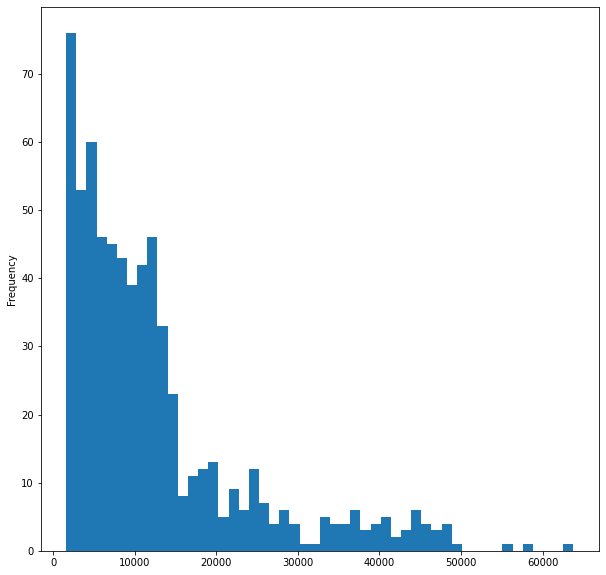

In [18]:
#visualisasi data untuk kolom charges yang berelasi dengan kolom sex = perempuan
data_female.charges.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

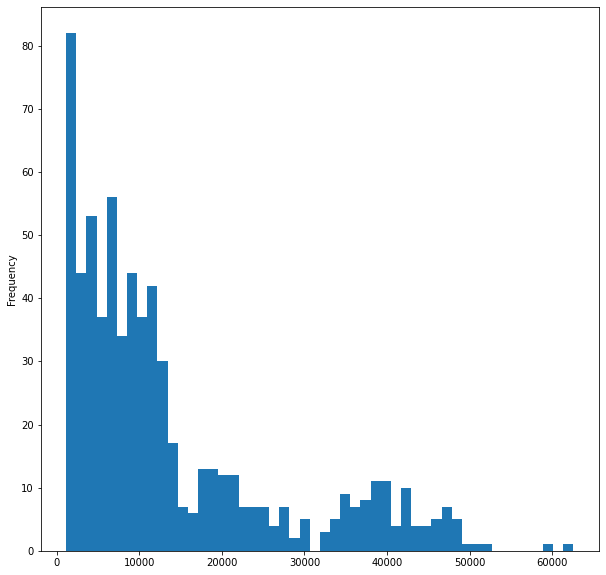

In [19]:
#visualisasi data untuk kolom charges yang berelasi dengan kolom sex = pria
data_male.charges.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

##**3.3.5 Visualisasi data untuk Kolom Charges berelasi dengan kolom 'smoker'**

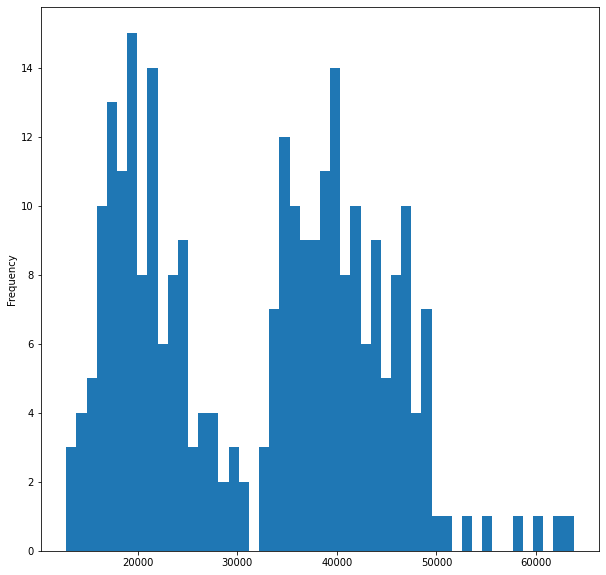

In [20]:
#visualisasi data untuk kolom charges yang berelasi dengan kolom smoker = iya
data3=sehat['smoker']=='yes'
data_yes=sehat[data3]
data_yes.charges.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

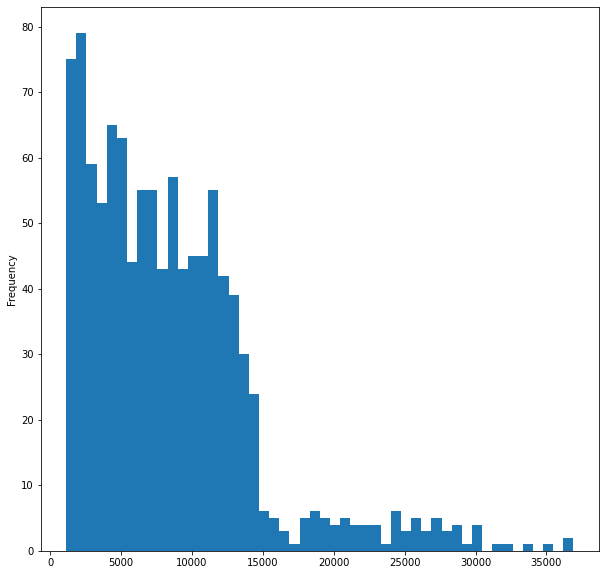

In [21]:
#visualisasi data untuk kolom charges yang berelasi dengan kolom smoker = tidak
data4=sehat['smoker']=='no'
data_no=sehat[data4]
data_no.charges.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

# **4. Persiapan Data**

##**4.1 Mengkonversi kolom (sex, smoker, region) dari bentuk string ke bentuk numerik**

In [22]:
sehat['sex'].unique()
sehat['sex']=sehat['sex'].map({'female':0,'male':1})
sehat['smoker']=sehat['smoker'].map({'yes':1,'no':0})
sehat['region']=sehat['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [23]:
#mengecek kembali data setelah dikonversi 
sehat.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [24]:
# Mengecek total baris dan kolom dari dataset
sehat.shape

(1338, 7)

## **4.2 Melakukan pembagian data pada dataset dengan train_test_split**

In [25]:
X = sehat.drop(['charges'],axis=1)
y = sehat['charges']

In [26]:
# Melakukan pembagian data dengan train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
# Mengecek jumlah baris pada data latih dan data 
print(X_train.shape)
print(X_test.shape)

(1070, 6)
(268, 6)


# **5. Pembuatan Model**

In [28]:
#pembuatan model regresi linear, SVR, Random Forest, Gradient Boosting Regressor
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
#prediksi pada data test
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

sehat1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [30]:
#menampilkan hasil dari prediksi data test
sehat1

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,11178.078508,11001.128629
887,5272.17580,7116.295018,9492.515425,5500.772881,5840.174656
890,29330.98315,36909.013521,9648.758701,28226.865566,28001.980112
1293,9301.89355,9507.874691,9555.044136,10142.509763,9745.291602
259,33750.29180,27013.350008,9420.421978,34653.342596,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47475.765576,45431.423211
575,12222.89830,11814.555568,9625.431547,12333.864883,12465.025294
535,6067.12675,7638.107736,9504.168517,6493.346763,6974.336525
543,63770.42801,40959.081722,9605.004594,47069.823085,47862.047791


## **5.1 Membandingkan performa antar model secara visual**

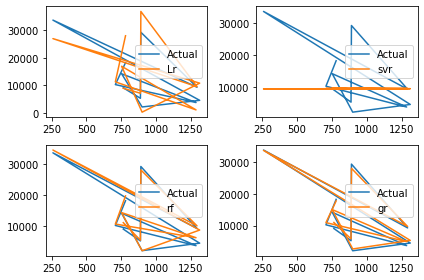

In [31]:
#algoritma regresi linear
plt.subplot(221)
plt.plot(sehat1['Actual'].iloc[0:11],label='Actual')
plt.plot(sehat1['Lr'].iloc[0:11],label="Lr")
plt.legend()

#algoritma SVR
plt.subplot(222)
plt.plot(sehat1['Actual'].iloc[0:11],label='Actual')
plt.plot(sehat1['svm'].iloc[0:11],label="svr")
plt.legend()

#algoritma random forest
plt.subplot(223)
plt.plot(sehat1['Actual'].iloc[0:11],label='Actual')
plt.plot(sehat1['rf'].iloc[0:11],label="rf")
plt.legend()

#algoritma gradient boosting
plt.subplot(224)
plt.plot(sehat1['Actual'].iloc[0:11],label='Actual')
plt.plot(sehat1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

# **6. Evaluasi Model**

In [32]:
#evaluasi model menggunakan metrics.r2_score
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [33]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.864250309539261 0.8779726251291786


In [34]:
#evaluasi model menggunakan mean absolute error
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [35]:
print(s1,s2,s3,s4)

4186.508898366432 8592.428727899724 2482.6888957392725 2447.9515580545844


# **7. Prediksi Biaya**

In [36]:
sehat = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [37]:
df = pd.DataFrame(sehat,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


##**7.1 Prediksi biaya menggunakan algoritma Gradient Boosting Regressor**

In [38]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  44757.2485385127


# **Penutupan**

Model digunakan untuk memprediksi data biaya asuransi kesehatan yang dikeluarkan oleh pasien. Algoritma yang digunakan dalam pembuatan model meliputi Gradient Boosting Regressor, Linear Regression, Support Vector Regression, dan Random Forest.

**Referensi**

1. Dokumentasi Scikit-learn : https://scikit-learn.org/stable/modules/classes.html
2. Dokumentasi Plotly : https://plotly.com/python/
3. https://www.kaggle.com/priyang/health-insurance-cost-prediction-using-ml
4. https://www.kaggle.com/goksunazlican/analysis-of-medical-cost-personal-datasets
5. https://www.kaggle.com/mohaiminul101/medical-cost-personal-cost-prediction

